In [1]:
import numpy as np
import pandas as pd
import sys
import os
import itk
code = os.path.abspath('../')
sys.path.append(code)
import src
from src.DELAT_utils import collect_region_stats_paths
import matplotlib.pyplot as plt
from src.analysis import *
from sklearn.linear_model import LinearRegression
from tifffile import imread, imwrite
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns
from scipy.stats import linregress
import datetime


In [2]:
base_path = '/nrs/spruston/Boaz/I2'
base_path = r'X:\Boaz\I2'
meta = pd.read_excel(os.path.join(code, 'paramaters','metadata.xlsx'), 'Metadata', index_col=0)
csv_paths = collect_region_stats_paths(base_path)
region_data = load_region_data(csv_paths)
slope = 1.4247
intercept = 202.8271
meta

Data Validation extension is not supported and will be removed


,Cage,AnimalID,Genotype,Pulse,Chase,sex,DOB,Perfusion,Path,Age,Interval,Group,Comment
Number,,,,,,,,,,,,,
1,215258,549057,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-03,2024-09-11,/nearline/spruston/Boaz/DELTA/I2/2024-09-19_iDISCO_Calibr...,6.400000,0,Zero,Zero day iDISCO
2,216141,550749,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-28,2024-09-11,/nearline/spruston/Boaz/DELTA/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO
3,216141,550751,GluA2-HaloTag line1,Skipped,JFX673,female,2024-03-28,2024-09-11,/nearline/spruston/Boaz/DELTA/I2/2024-09-19_iDISCO_Calibr...,5.566667,0,Zero,Zero day iDISCO
4,216314,551089,GluA2-HaloTag line1,Skipped,JFX673,female,2024-04-02,2024-09-11,/nearline/spruston/Boaz/DELTA/I2/2024-09-19_iDISCO_Calibr...,5.400000,0,Zero,Zero day iDISCO
5,218600,555600,PSD95-HaloTag,JFX673,JF552,male,2024-06-03,2024-08-28,/nearline/spruston/Boaz/DELTA/I2/2024-09-09_Compare_iDISC...,2.866667,2,Control,"Problem with Pulse, test for iDISCO"
6,215695,549895,GluA2-HaloTag line1,Skipped,JFX673,female,2024-03-15,2024-09-11,/nearline/spruston/Boaz/DELTA/I2/20240930_iDISCO_round2/,6.000000,0,Zero,Zero day iDISCO
7,216141,550750,GluA2-HaloTag line1,Skipped,JF552,female,2024-03-28,2024-09-11,/nearline/spruston/Boaz/DELTA/I2/20240930_iDISCO_round2/,5.566667,0,Zero,Zero day iDISCO
8,216798,552102,GluA2-HaloTag line1,Skipped,JF552,female,2024-04-17,2024-09-11,/nearline/spruston/Boaz/DELTA/I2/20240930_iDISCO_round2/,4.900000,0,Zero,Zero day iDISCO
9,219292,550746,GluA2-HaloTag line1,JFX673,JF552,female,2024-03-28,2024-08-23,/nearline/spruston/Boaz/DELTA/I2/20240930_iDISCO_round2/,4.933333,3,Reversal,BM24


In [3]:
csv_paths

{'555600': 'X:\\Boaz\\I2\\2024-09-09_Compare_iDISCO_EZCleat_THF\\ANM555600_PSD-HT_iDISCO\\itk\\region_stats.csv',
 '549057': 'X:\\Boaz\\I2\\2024-09-19_iDISCO_CalibrationBrains\\ANM549057_left_JF552\\itk\\region_stats.csv',
 '550749': 'X:\\Boaz\\I2\\2024-09-19_iDISCO_CalibrationBrains\\ANM550749_left_JF552\\itk\\region_stats.csv',
 '550751': 'X:\\Boaz\\I2\\2024-09-19_iDISCO_CalibrationBrains\\ANM550751_left_JF673\\itk\\region_stats.csv',
 '551089': 'X:\\Boaz\\I2\\2024-09-19_iDISCO_CalibrationBrains\\ANM551089_left_JF673\\itk\\region_stats.csv',
 '549895': 'X:\\Boaz\\I2\\20240930_iDISCO_round2\\ANM549895_JFX673\\itk\\region_stats.csv',
 '550746': 'X:\\Boaz\\I2\\20240930_iDISCO_round2\\ANM550746_BM24\\itk\\region_stats.csv',
 '550748': 'X:\\Boaz\\I2\\20240930_iDISCO_round2\\ANM550748_BM26\\itk\\region_stats.csv',
 '550750': 'X:\\Boaz\\I2\\20240930_iDISCO_round2\\ANM550750_JF552\\itk\\region_stats.csv',
 '552100': 'X:\\Boaz\\I2\\20240930_iDISCO_round2\\ANM552100_JFX673\\itk\\region_stats.c

In [4]:

filtered_meta = meta[(meta['Group'] == 'Reversal') & (meta['Path'].str.startswith('/nrs/'))]

In [5]:
columns = ['Region', 'mean_ch1', 'mean_ch2']
filters = {
    'Group': ['Reversal'],  # Include only animals from the 'Zero' group
}
meta_columns = ['AnimalID']
unified_df = get_filtered(meta, filters, region_data, columns, meta_columns)
reversal = unified_df.pivot(index='Region', columns='AnimalID', values=['mean_ch1', 'mean_ch2'])

In [6]:
Chase = reversal['mean_ch1'] 

In [7]:

Pulse =reversal['mean_ch2'] * slope + intercept

In [8]:
Chase

AnimalID,550746,550748,552830,553919
Region,,,,
1,1385.400937,1430.464992,1016.438354,1319.216475
2,2587.552541,2206.537224,1844.987239,2860.002468
6,906.636402,849.678830,765.222603,1163.632009
7,1118.944903,1046.416179,871.002701,1457.716484
9,3620.774879,3464.879419,2777.000455,4078.907001
...,...,...,...,...
607344850,1873.728733,1833.418066,1538.815021,2200.774399
607344854,1987.816990,1983.742528,1716.064499,2481.932092
607344858,1914.192511,1887.382542,1595.727031,2347.007885


In [9]:
Pulse

AnimalID,550746,550748,552830,553919
Region,,,,
1,1943.212746,2035.998719,1808.868929,1585.051386
2,2739.420295,2544.657393,2469.970538,2609.906868
6,894.741672,881.226279,930.180286,1080.334998
7,1070.613308,1057.614244,1064.369290,1244.806925
9,4460.955627,4566.329010,4343.453240,4061.203315
...,...,...,...,...
607344850,2184.507782,2192.704448,2124.537408,2190.730447
607344854,1843.891665,1855.684848,1838.154987,1952.789920
607344858,2040.762162,2087.415188,1992.191388,2153.576761


In [10]:
Fraction_Pulse = Pulse/(Chase+Pulse)

In [11]:
Fraction_Pulse

AnimalID,550746,550748,552830,553919
Region,,,,
1,0.583790,0.587342,0.640238,0.545766
2,0.514255,0.535583,0.572421,0.477139
6,0.496698,0.509113,0.548649,0.481440
7,0.488963,0.502661,0.549956,0.460609
9,0.551980,0.568573,0.609997,0.498913
...,...,...,...,...
607344850,0.538290,0.544619,0.579943,0.498856
607344854,0.481219,0.483323,0.517175,0.440341
607344858,0.516001,0.525163,0.555250,0.478510


In [12]:
Lifetime = -3/np.log(Fraction_Pulse)

In [13]:
Lifetime

AnimalID,550746,550748,552830,553919
Region,,,,
1,5.573999,5.637524,6.727734,4.954055
2,4.511029,4.804612,5.377488,4.054342
6,4.287109,4.443883,4.997524,4.104113
7,4.193059,4.361485,5.017418,3.869942
9,5.048440,5.313257,6.069167,4.314533
...,...,...,...,...
607344850,4.843725,4.936906,5.506359,4.313835
607344854,4.101541,4.126153,4.549776,3.657618
607344858,4.534148,4.658043,5.099119,4.070130


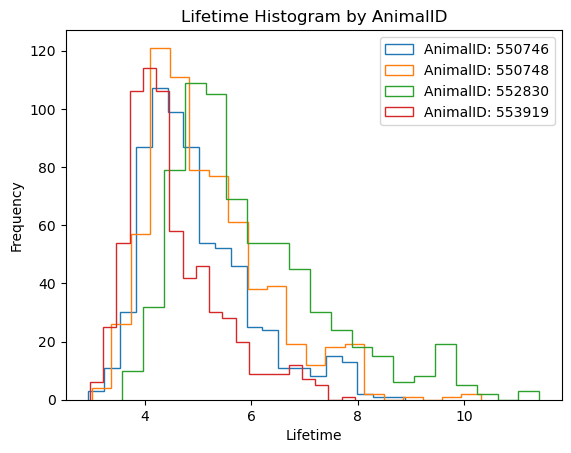

In [24]:
import matplotlib.pyplot as plt

# Assuming Lifetime is your DataFrame
for animal_id in Lifetime.columns:
    plt.hist(Lifetime[animal_id].dropna(), bins=20, alpha=1, label=f'AnimalID: {animal_id}', histtype='step')

plt.legend()
plt.xlabel('Lifetime')
plt.ylabel('Frequency')
plt.title('Lifetime Histogram by AnimalID')
plt.show()